In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn import svm


data = pd.read_csv('StudentScore.xls')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Library and head of Data
Using pandas, seaborn, sklearn model and pipeline
Preprocessing using sk learn as StandardScaler,OneHotEncoder,OrdinalEncoder

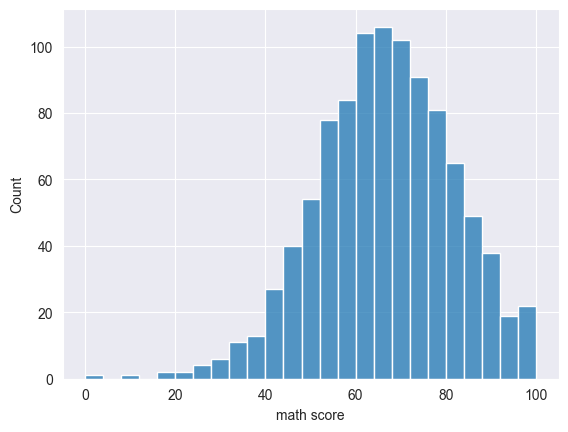

In [10]:
target = "math score"
x = data.drop(target,axis=1)
y = data[target]
sn.histplot(data["math score"])
# # sn.histplot(data["reading score"])
# plt.title("Math score")
# plt.savefig("Math score.png")
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
Encoder = OneHotEncoder(sparse_output=False)
preprocess = ColumnTransformer(transformers=[
    ('Num',StandardScaler(),['writing score']),
    ('Ordinal',OrdinalEncoder(),['gender','lunch','parental level of education','test preparation course']),
    ('Nom',OneHotEncoder(),['race/ethnicity'])
    ])

REG = Pipeline(steps=[
    ('scaler',preprocess),
    ('RFR', RandomForestRegressor(random_state=42)),
])

Preprocess Number data, Ordinal Data, Norminal
Using pipeline to process scaler and combine Randfo

In [12]:

parameters = {'RFR__n_estimators':[10,50,100,200],
              'RFR__criterion':['absolute_error','squared_error','poisson'],
              'RFR__max_features':["sqrt","log2"],
              'RFR__max_depth':[None,5,10,15,20]

                }



model = GridSearchCV(REG, param_grid=parameters,verbose=2,n_jobs=6,scoring='r2')
model.fit(x_train,y_train)
print(model.best_params_)
print(model.best_score_)
# for i,j in zip(x_train["race/ethnicity"], Result):
#     print("Befor {}, After {}".format(i,j))
# Result = scaler.fit_transform(x_train[["reading score"]])
# for i,j in zip(x_train["reading score"],Result):
#     (print("Before {} After {}".format(i,j)))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'RFR__criterion': 'absolute_error', 'RFR__max_depth': 10, 'RFR__max_features': 'sqrt', 'RFR__n_estimators': 100}
0.8004029258827648


In [20]:

RGR_final = model.best_estimator_
RGR_final.fit(x_train,y_train)
y_pred_math_score = RGR_final.predict(x_test)
for x,y in zip(y_pred_math_score,y_test):
    print("Pred : {}, Answer : {},".format(x,y))

Pred : 77.71, Answer : 91,
Pred : 63.2, Answer : 53,
Pred : 75.325, Answer : 80,
Pred : 73.92, Answer : 74,
Pred : 86.48, Answer : 84,
Pred : 75.42, Answer : 81,
Pred : 65.875, Answer : 69,
Pred : 57.755, Answer : 54,
Pred : 71.995, Answer : 87,
Pred : 53.69, Answer : 51,
Pred : 52.87, Answer : 45,
Pred : 54.83, Answer : 30,
Pred : 70.2, Answer : 67,
Pred : 53.905, Answer : 49,
Pred : 83.225, Answer : 85,
Pred : 73.03, Answer : 65,
Pred : 49.25, Answer : 53,
Pred : 48.015, Answer : 55,
Pred : 54.29, Answer : 48,
Pred : 54.365, Answer : 56,
Pred : 72.925, Answer : 79,
Pred : 46.88, Answer : 43,
Pred : 62.45, Answer : 45,
Pred : 38.6, Answer : 36,
Pred : 71.385, Answer : 80,
Pred : 82.005, Answer : 80,
Pred : 72.68, Answer : 68,
Pred : 50.54, Answer : 40,
Pred : 45.015, Answer : 34,
Pred : 53.06, Answer : 49,
Pred : 65.925, Answer : 62,
Pred : 72.225, Answer : 71,
Pred : 62.545, Answer : 62,
Pred : 82.99, Answer : 76,
Pred : 83.3, Answer : 84,
Pred : 49.7, Answer : 45,
Pred : 72.185, Ans

Predict MathScore using RGR with best parameters


In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_math_score)
r2 = r2_score(y_test, y_pred_math_score)
print("mae score : ", mae)
print("r2 score :", r2)

mae score :  5.679600000000001
r2 score : 0.7742683183172077


How good is it : 5,6 point in 100 point ( 6% )




r2 score nearly 1, over 0,5 is good